In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [226]:
chips = pd.read_csv('./chip_dataset.csv')
chips

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00


In [160]:
chips.dtypes


Product                   object
Type                      object
Release Date              object
Process Size (nm)         object
TDP (W)                   object
Die Size (mm^2)           object
Transistors (million)     object
Freq (GHz)               float64
Foundry                   object
Vendor                    object
FP16 GFLOPS              float64
FP32 GFLOPS              float64
FP64 GFLOPS              float64
dtype: object

In [161]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


### Explore the missingness in the dataset for categorical and numerical data

In [206]:
chips.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

In [163]:
missing_percentage = chips.isnull().sum() / len(chips) * 100

In [164]:
missing_percentage

Product                   0.000000
Type                      0.000000
Release Date              4.024267
Process Size (nm)         0.000000
TDP (W)                   8.837209
Die Size (mm^2)           7.118301
Transistors (million)    11.223458
Freq (GHz)                8.837209
Foundry                  12.436805
Vendor                    0.000000
FP16 GFLOPS              83.822042
FP32 GFLOPS              65.925177
FP64 GFLOPS              74.155713
dtype: float64

### Freq and TDP seem to have related missingness suggesting an MAR missingness

### Release date might missigness might be MCAR

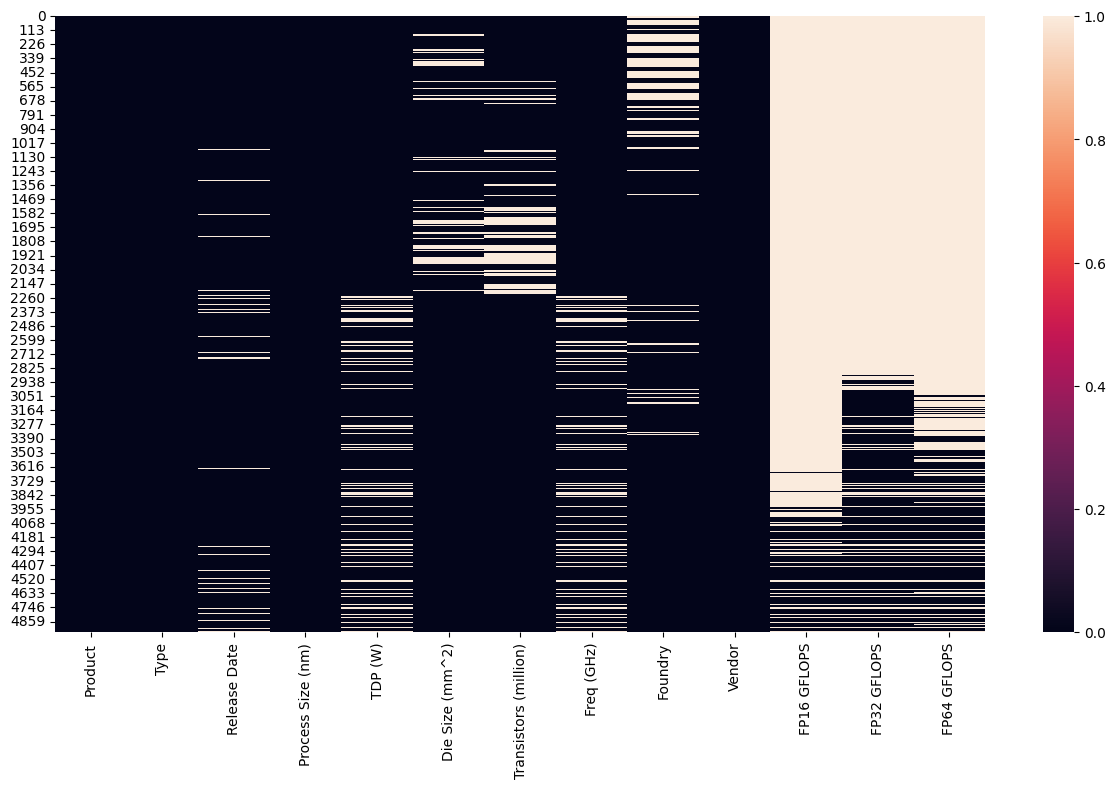

In [165]:
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(chips.isnull())
plt.show()

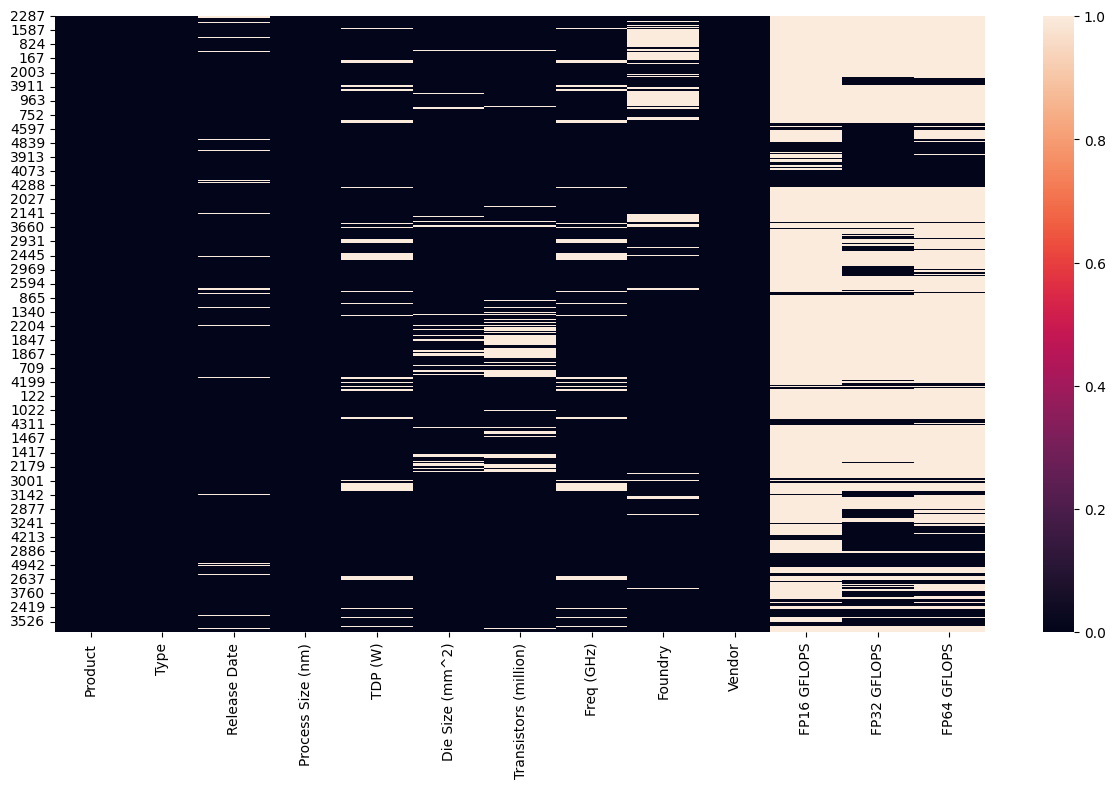

In [33]:
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(chips.sort_values(by='Product').isnull())
plt.show()

### The missigness in the FP16 Column seems to be related to the Type column hence (MAR)

In [34]:
chips[(chips['FP16 GFLOPS'].notnull()) & (chips.Type == 'CPU')]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS


In [35]:
chips[(chips['FP32 GFLOPS'].notnull()) & (chips.Type == 'CPU')]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS


In [36]:
chips[(chips['FP64 GFLOPS'].notnull()) & (chips.Type == 'CPU')]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS


In [14]:
pd.options.display.max_rows = 100

### The missigness of Foundry could be credited to the product
- This is due to the fact that all products with the same name seem to be missing a foundry consistently

In [37]:
chips.loc[:,'Product'].value_counts().iloc[:20]

Product
AMD Sempron 2800+                9
AMD Sempron 3000+                8
AMD Athlon 64 3200+              8
AMD Athlon 64 3500+              7
AMD Sempron 2600+                6
AMD Athlon 64 3000+              5
AMD Athlon 64 3800+              5
AMD Radeon Vega 3 Embedded       5
AMD Sempron 3100+                5
AMD Athlon 64 4000+              5
AMD Athlon XP 2000+              5
AMD Athlon XP 2600+              5
AMD Sempron 3300+                4
Intel Pentium 4 HT 520           4
AMD Mobile Athlon 64 2800+       4
AMD Athlon 64 3400+              4
Intel UHD Graphics 630           4
AMD Radeon R5 Mobile Graphics    4
AMD Opteron 144                  4
AMD Opteron 146                  4
Name: count, dtype: int64

In [38]:
chips[chips.Foundry.isnull()].loc[:,'Product'].value_counts().iloc[:20]

Product
AMD Sempron 2800+             9
AMD Sempron 3000+             8
AMD Athlon 64 3200+           8
AMD Athlon 64 3500+           7
AMD Sempron 2600+             6
AMD Athlon 64 3000+           5
AMD Athlon XP 2600+           5
AMD Athlon XP 2000+           5
AMD Sempron 3100+             5
AMD Athlon 64 4000+           5
AMD Athlon 64 3800+           5
AMD Opteron 146               4
AMD Mobile Athlon 64 2800+    4
AMD Sempron 3300+             4
AMD Athlon XP 2400+           4
AMD Opteron 144               4
AMD Athlon 64 3400+           4
AMD Athlon XP 2200+           4
AMD Athlon XP 1800+           3
AMD Mobile Athlon 64 3000+    3
Name: count, dtype: int64

In [39]:
chips.loc[:,['FP16 GFLOPS']][chips['FP16 GFLOPS'].isnull()].count()

FP16 GFLOPS    0
dtype: int64

In [40]:
chips.loc[:,['Die Size (mm^2)', 'Type'] ][chips['Die Size (mm^2)'] > 150]

TypeError: '>' not supported between instances of 'str' and 'int'

### Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.

#### FOUNDRY
Fill with mode - since it is a categorical variable

In [227]:
chips['Foundry'].value_counts()
### Mode = TSMC 

chips['Foundry'].fillna('TSMC', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16296\2529148001.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chips['Foundry'].fillna('TSMC', inplace=True)


#### TDP
Fill with mean

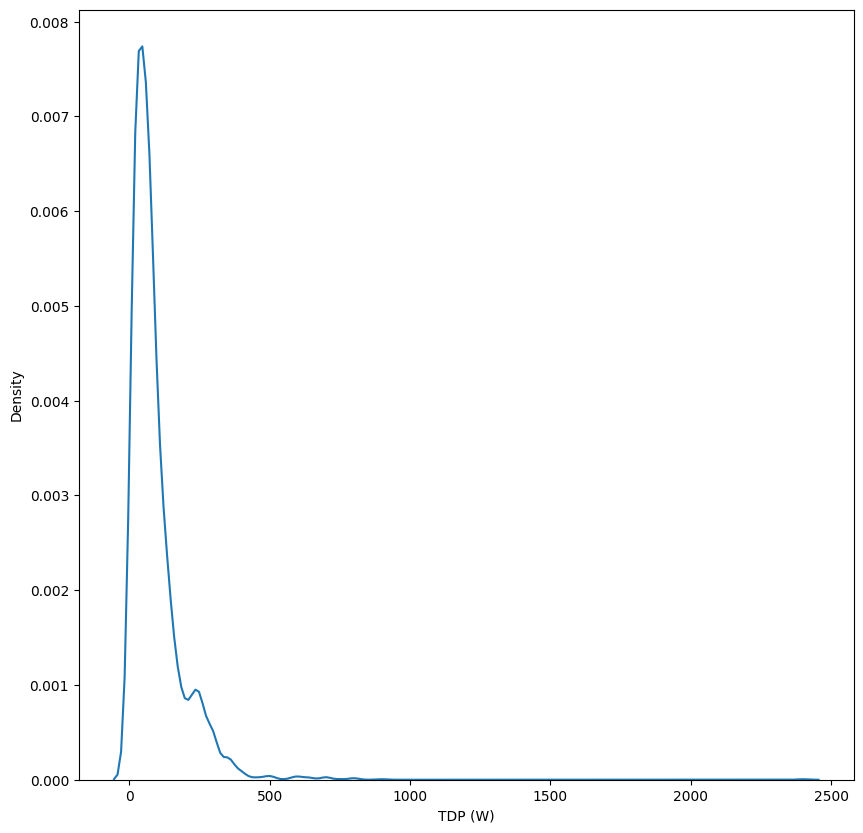

In [186]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=chips, x='TDP (W)')
plt.show()

In [228]:
### Convert TDP to integer
chips['TDP (W)'] = pd.to_numeric(chips['TDP (W)'], errors='coerce').astype(float)


In [189]:
chips['TDP (W)'].describe()

count    4054.000000
mean       92.539714
std        97.469175
min         1.000000
25%        35.000000
50%        65.000000
75%       119.000000
max      2400.000000
Name: TDP (W), dtype: float64

In [209]:
chips[chips['TDP (W)'].isnull()]

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2232,3dfx VSA-100,GPU,6/22/00,250,NaN,112,14,NaN,TSMC,3dfx,NaN,NaN,NaN
2237,3dfx VSA-101,GPU,NaN,180,NaN,112,14,NaN,TSMC,3dfx,NaN,NaN,NaN
2247,ATI All-In-Wonder Radeon 7200,GPU,7/31/00,180,NaN,111,30,166.0,TSMC,ATI,NaN,NaN,NaN
2248,ATI R100,GPU,4/1/00,180,NaN,111,30,NaN,TSMC,ATI,NaN,NaN,NaN
2249,ATI Fire GL2,GPU,6/1/00,180,NaN,100,unknown,120.0,IBM,ATI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4885,NVIDIA AD107,GPU,1/3/23,5,NaN,159,18900,NaN,TSMC,NVIDIA,NaN,NaN,NaN
4890,NVIDIA AD106,GPU,1/3/23,5,NaN,188,22900,NaN,TSMC,NVIDIA,NaN,NaN,NaN
4907,NVIDIA GH100,GPU,3/21/23,4,NaN,814,80000,NaN,TSMC,NVIDIA,NaN,NaN,NaN
4916,NVIDIA GA10B,GPU,NaN,8,NaN,unknown,unknown,NaN,Samsung,NVIDIA,NaN,NaN,NaN


In [229]:
chips['TDP (W)'].fillna(92.539714, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16296\3601877885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chips['TDP (W)'].fillna(92.539714, inplace=True)


#### Frequency
Fill with mean

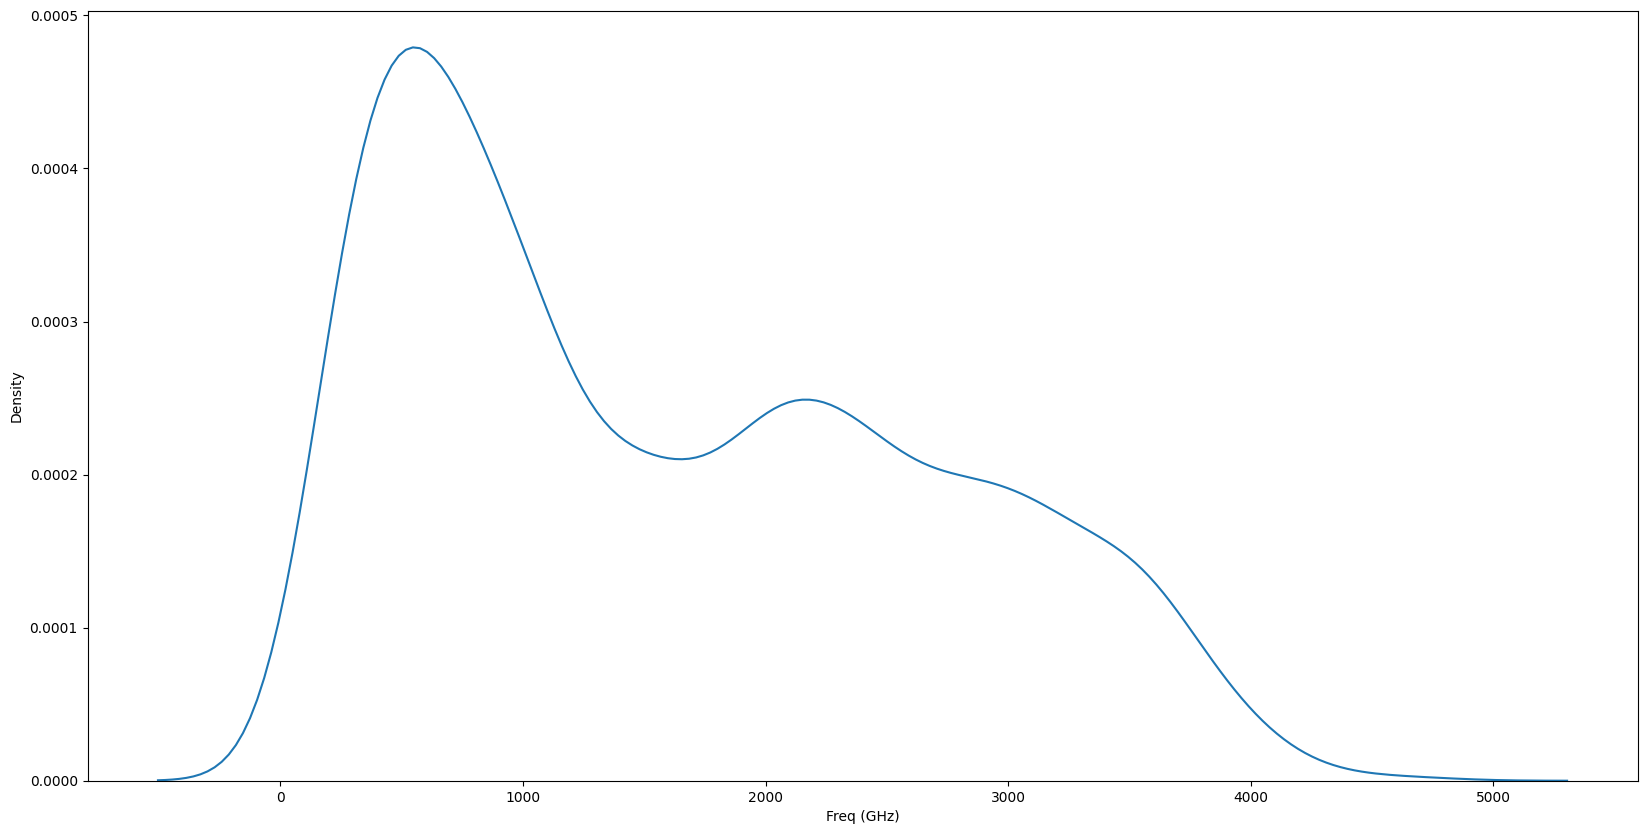

In [211]:
plt.figure(figsize=(20,10))

sns.kdeplot(data=chips, x='Freq (GHz)')
plt.show()

In [192]:
chips['Freq (GHz)'].describe()

count    4508.000000
mean     1615.430790
std      1084.641452
min       100.000000
25%       650.000000
50%      1400.000000
75%      2500.000000
max      4700.000000
Name: Freq (GHz), dtype: float64

In [230]:
chips['Freq (GHz)'].fillna(1615.430790, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16296\1142201383.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chips['Freq (GHz)'].fillna(1615.430790, inplace=True)


#### Transistors
Fill with mean

In [231]:
chips['Transistors (million)']= pd.to_numeric(chips['Transistors (million)'], errors='coerce').astype(float)

In [49]:
chips['Transistors (million)'].describe()

count      4139.000000
mean       4836.373762
std       12005.156903
min           8.000000
25%         163.500000
50%         950.000000
75%        4050.000000
max      153000.000000
Name: Transistors (million), dtype: float64

In [232]:
chips['Transistors (million)'].fillna(4836.373762, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16296\3543501850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chips['Transistors (million)'].fillna(4836.373762, inplace=True)


#### Die Size

In [233]:
chips['Die Size (mm^2)'] = pd.to_numeric(chips['Die Size (mm^2)'], errors='coerce').astype(float)

In [52]:
chips['Die Size (mm^2)'].describe()

count    4229.000000
mean      212.972443
std       151.425313
min         6.000000
25%       114.000000
50%       169.000000
75%       257.000000
max      1280.000000
Name: Die Size (mm^2), dtype: float64

In [234]:
chips['Die Size (mm^2)'].fillna(212.972443 , inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16296\2546210755.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chips['Die Size (mm^2)'].fillna(212.972443 , inplace=True)


#### GFLOPS

In [54]:
chips['FP16 GFLOPS'].describe()

count       800.000000
mean      19033.061063
std       44865.341218
min          10.020000
25%        1299.500000
50%        6136.500000
75%       20175.000000
max      653700.000000
Name: FP16 GFLOPS, dtype: float64

In [235]:
chips['FP16 GFLOPS'].fillna(19033.061063, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16296\1967306182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chips['FP16 GFLOPS'].fillna(19033.061063, inplace=True)


In [218]:
chips['FP32 GFLOPS'].describe()

count     1685.000000
mean      5403.009359
std      11492.095538
min         12.800000
25%        384.000000
50%       1248.000000
75%       5069.000000
max      93240.000000
Name: FP32 GFLOPS, dtype: float64

In [236]:
chips['FP32 GFLOPS'].fillna(5403.009359, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16296\2302157899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chips['FP32 GFLOPS'].fillna(5403.009359, inplace=True)


In [220]:
chips['FP64 GFLOPS'].describe()

count     1278.000000
mean      1096.608263
std       5232.537404
min          3.600000
25%         59.247500
50%        136.350000
75%        382.450000
max      81720.000000
Name: FP64 GFLOPS, dtype: float64

In [237]:
chips['FP64 GFLOPS'].fillna(1096.608263, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16296\2929144059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chips['FP64 GFLOPS'].fillna(1096.608263, inplace=True)


In [240]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4945 non-null   float64
 5   Die Size (mm^2)        4945 non-null   float64
 6   Transistors (million)  4945 non-null   float64
 7   Freq (GHz)             4945 non-null   float64
 8   Foundry                4945 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            4945 non-null   float64
 11  FP32 GFLOPS            4945 non-null   float64
 12  FP64 GFLOPS            4945 non-null   float64
dtypes: float64(7), object(6)
memory usage: 502.4+ KB


### Transform temporal data to their corrrect format (date time)

In [241]:
chips['Release Date'] = pd.to_datetime(chips['Release Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_16296\1643747226.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chips['Release Date'] = pd.to_datetime(chips['Release Date'])


In [203]:
chips['Release Date'].describe()

count                             4746
mean     2012-09-04 02:02:16.536030464
min                1999-03-15 00:00:00
25%                2007-04-01 00:00:00
50%                2012-09-04 12:00:00
75%                2018-04-11 00:00:00
max                2024-01-08 00:00:00
Name: Release Date, dtype: object

In [250]:
chips = chips.sort_values('Release Date')

In [252]:
chips['Release Date'] = chips['Release Date'].fillna(method='ffill')

C:\Users\user\AppData\Local\Temp\ipykernel_16296\1318074875.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chips['Release Date'] = chips['Release Date'].fillna(method='ffill')


In [253]:
chips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4945 entries, 2283 to 4940
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Product                4945 non-null   object        
 1   Type                   4945 non-null   object        
 2   Release Date           4945 non-null   datetime64[ns]
 3   Process Size (nm)      4945 non-null   object        
 4   TDP (W)                4945 non-null   float64       
 5   Die Size (mm^2)        4945 non-null   float64       
 6   Transistors (million)  4945 non-null   float64       
 7   Freq (GHz)             4945 non-null   float64       
 8   Foundry                4945 non-null   object        
 9   Vendor                 4945 non-null   object        
 10  FP16 GFLOPS            4945 non-null   float64       
 11  FP32 GFLOPS            4945 non-null   float64       
 12  FP64 GFLOPS            4945 non-null   float64       
dtypes: da

### Moore's Law still holds, especially in GPUs.

In [66]:
chips['Release Date'].sort_values()

2283   1999-03-15
26     2000-01-12
25     2000-01-12
2282   2000-03-01
2285   2000-03-04
          ...    
2211   2024-01-08
2212   2024-01-08
2213   2024-01-08
2216   2024-01-08
4943   2024-01-08
Name: Release Date, Length: 4945, dtype: datetime64[ns]

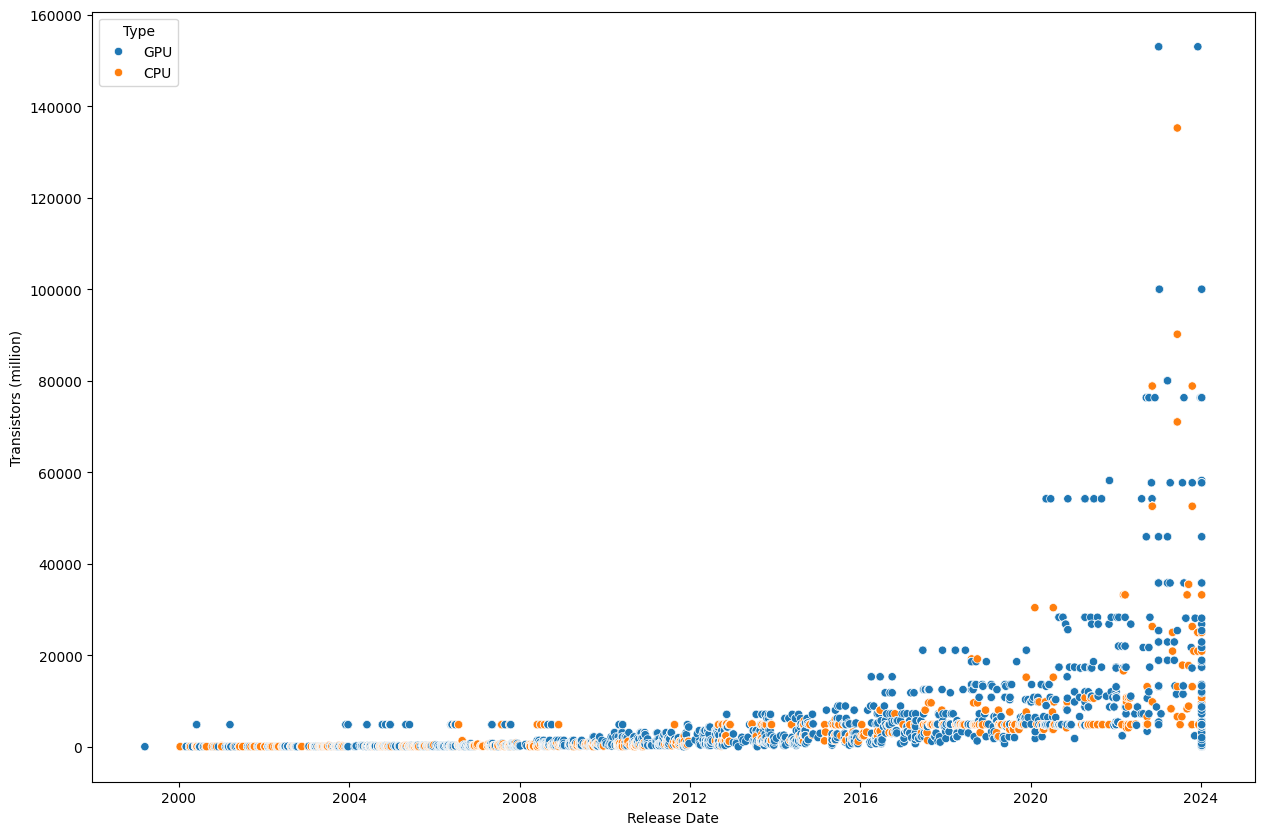

In [254]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(data=chips, x='Release Date', y='Transistors (million)', hue='Type')
ticks = np.arange(14)
plt.show()

Moore's Law Does not hold

### Dannard Scaling is still valid in general.

#### Dennard Scaling suggests that as transistors get smaller, their power density stays constant, so that power use stays in proportion with area.


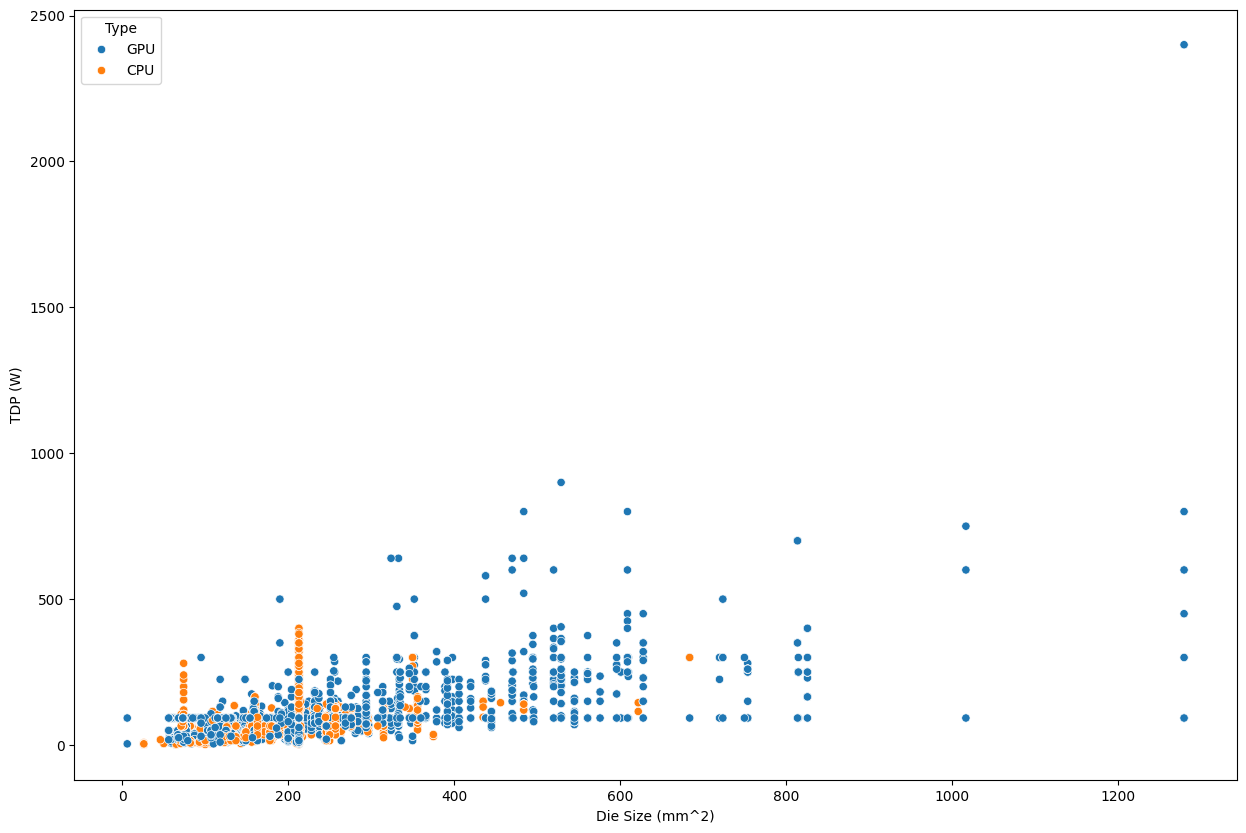

In [255]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(data=chips, x='Die Size (mm^2)', y='TDP (W)', hue='Type')
ticks = np.arange(14)
plt.show()

Dennard's Scaling is still valid

### CPUs have higher frequencies, but GPUs are catching up.

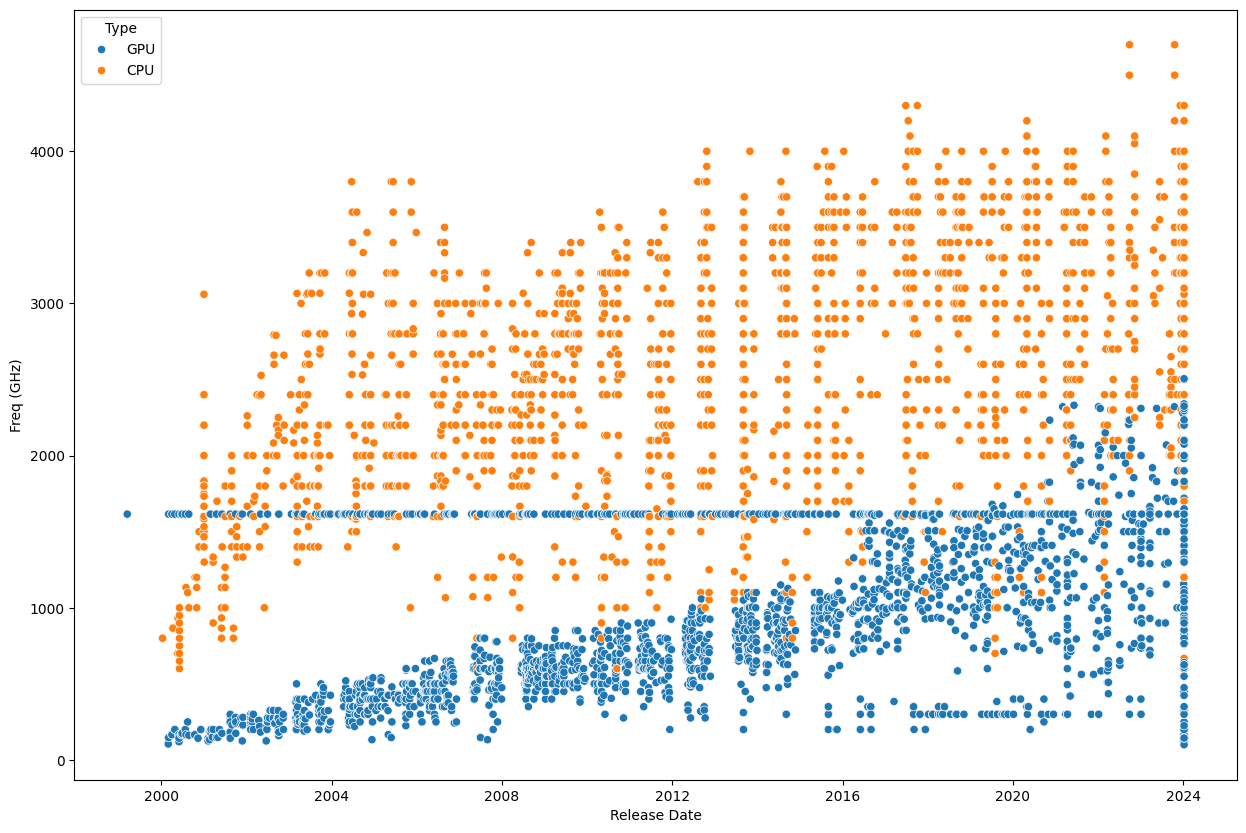

In [256]:
fig, ax = plt.subplots(figsize=(15,10))

# years = chips.loc[:,['Release Date','Freq()',]]groupby(chips['Release Date'].dt.year).sum().reset_index()

sns.scatterplot(data=chips, x='Release Date', y='Freq (GHz)', hue='Type')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16296\161650360.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


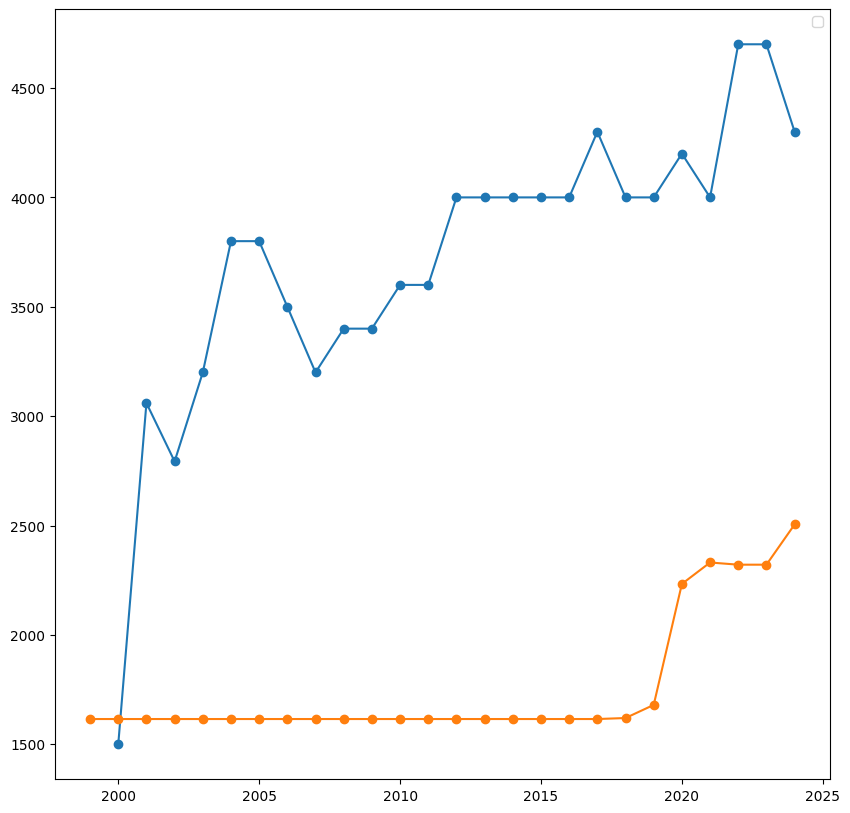

In [257]:
# fig, ax = plt.subplots(figsize=(10,10))

cpu = chips[chips.Type == 'CPU'].groupby(chips['Release Date'].dt.year).max('Freq (GHz)').reset_index()
gpu = chips[chips.Type == "GPU"].groupby(chips['Release Date'].dt.year).max('Freq (GHz)').reset_index()

plt.figure(figsize=(10,10))
plt.plot(cpu['Release Date'], cpu['Freq (GHz)'], marker='o')
plt.plot(gpu['Release Date'], gpu['Freq (GHz)'], marker='o')

plt.legend()
plt.show()


GPUs seem to be catching up slowly but surely

### GPU performance doubles every 1.5 years.

In [276]:
chips['Release Date'].dt.year.nunique()

26

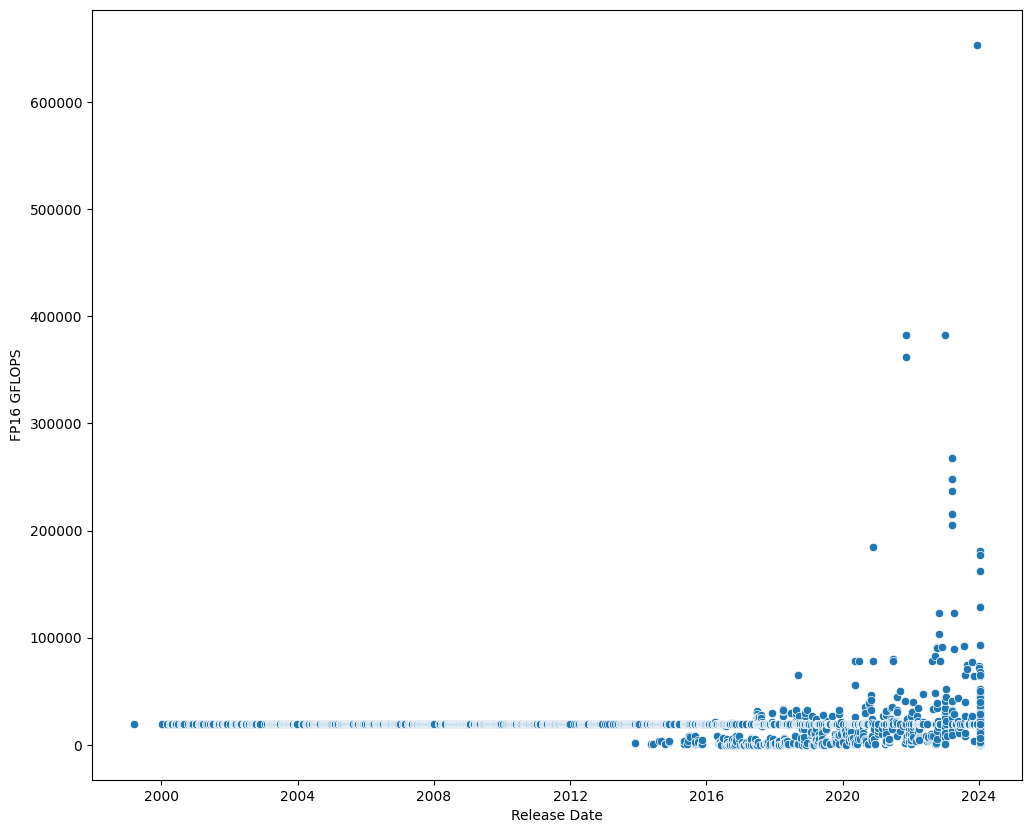

In [258]:
fig, ax = plt.subplots(figsize=(12,10))
sorted_years = chips.sort_values(by='Release Date')

sns.scatterplot(data=chips, x='Release Date', y='FP16 GFLOPS')
plt.show()
labels = chips['Release date'].dt.year.to_list()
np.arange()

ax.set_xticks()

# plt.plot(sorted_years['Release Date'], sorted_years['FP16 GFLOPS'])
# plt.show()

### GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.

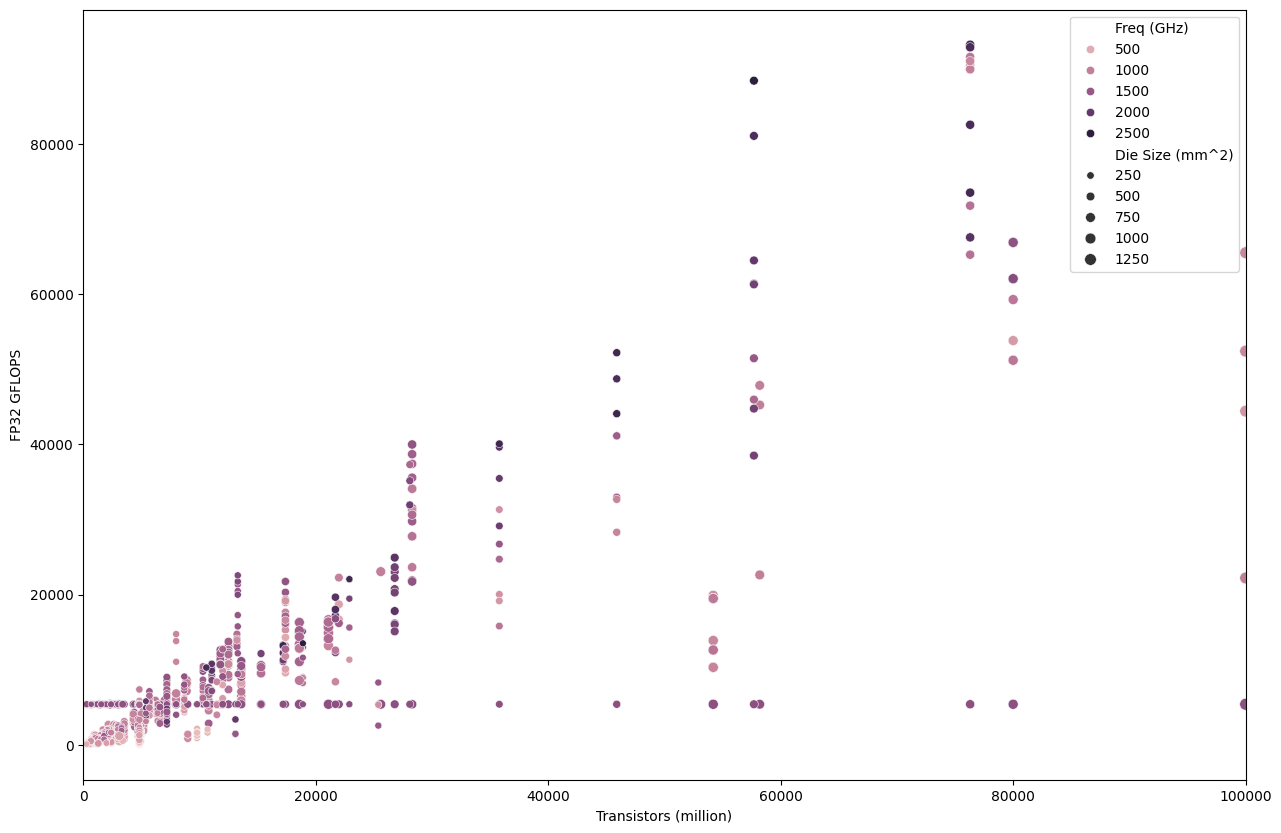

In [259]:
fig, ax = plt.subplots(figsize=(15,10))
gpu_chips = chips[chips.Type == 'GPU']
sns.scatterplot(data=gpu_chips, x='Transistors (million)', y='FP32 GFLOPS', hue='Freq (GHz)', size='Die Size (mm^2)')

plt.legend()
ax.set_xlim(0,100000)
plt.show()


### Process Size for Intel, AMD and Nvidia lies in comparatively lower range than for ATI and other vemdors


C:\Users\user\AppData\Local\Temp\ipykernel_16296\2824394763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edited['Vendor'] = edited['Vendor'].apply(lambda x: 'Other')


<Axes: xlabel='Vendor', ylabel='Process Size (nm)'>

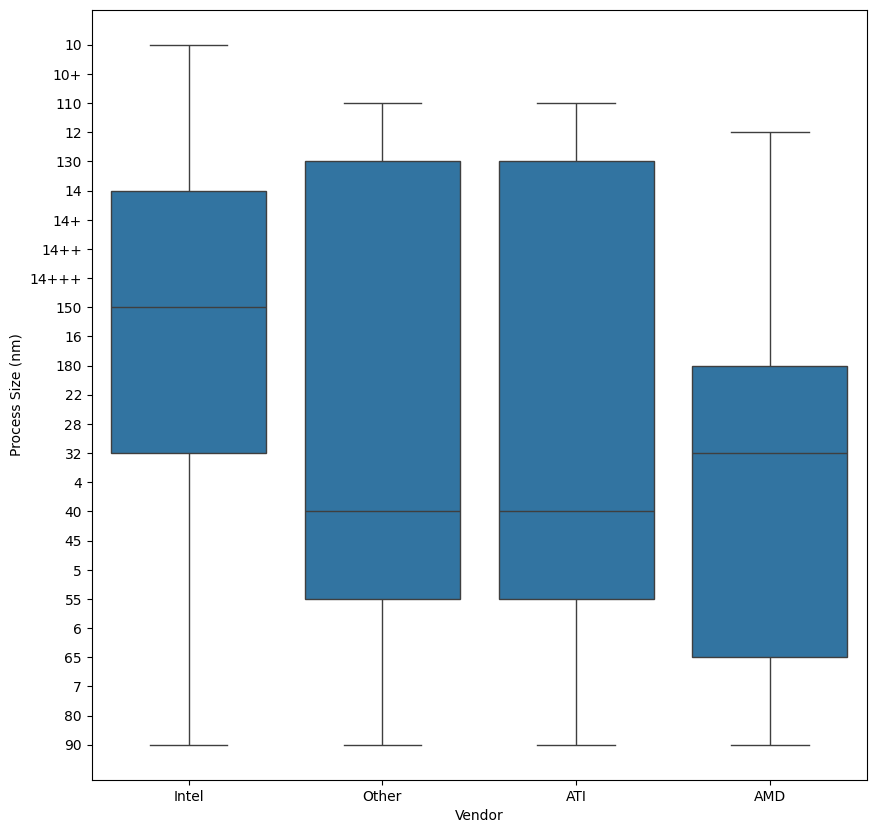

In [260]:
fig, ax = plt.subplots(figsize=(10,10))

filtered = chips[(chips.Vendor == 'AMD') | (chips.Vendor == 'Intel') | (chips.Vendor == 'Nvidia') | (chips.Vendor == 'ATI')]
edited = chips[(chips.Vendor != 'AMD') & (chips.Vendor != 'Intel') & (chips.Vendor != 'NVIDIA') & (chips.Vendor == 'ATI')]
edited['Vendor'] = edited['Vendor'].apply(lambda x: 'Other')
concatenated = pd.concat([filtered, edited]).sort_values(by='Process Size (nm)')

sns.boxplot(data=concatenated, x='Vendor', y='Process Size (nm)')

### TSMC makes the highest number of chips in the world

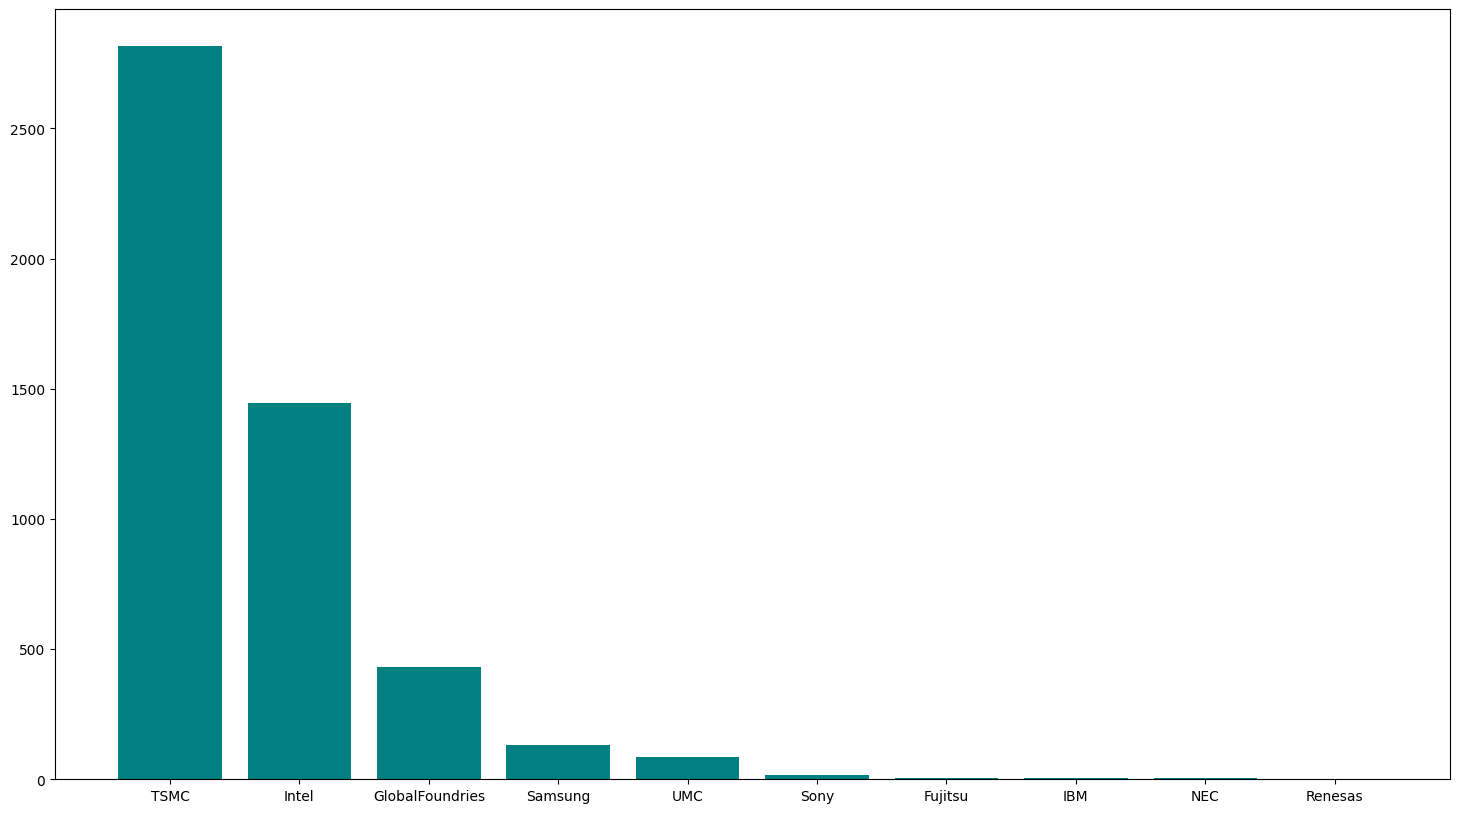

In [132]:
chips['Foundry'].value_counts()

plt.figure(figsize=(18,10))
counts = chips.groupby('Foundry').count().reset_index().sort_values(by='Product', ascending=False)

plt.bar(counts['Foundry'], counts['Product'], color='Teal')
plt.title()

plt.show()

### Calculate and visualized the correlation among the features

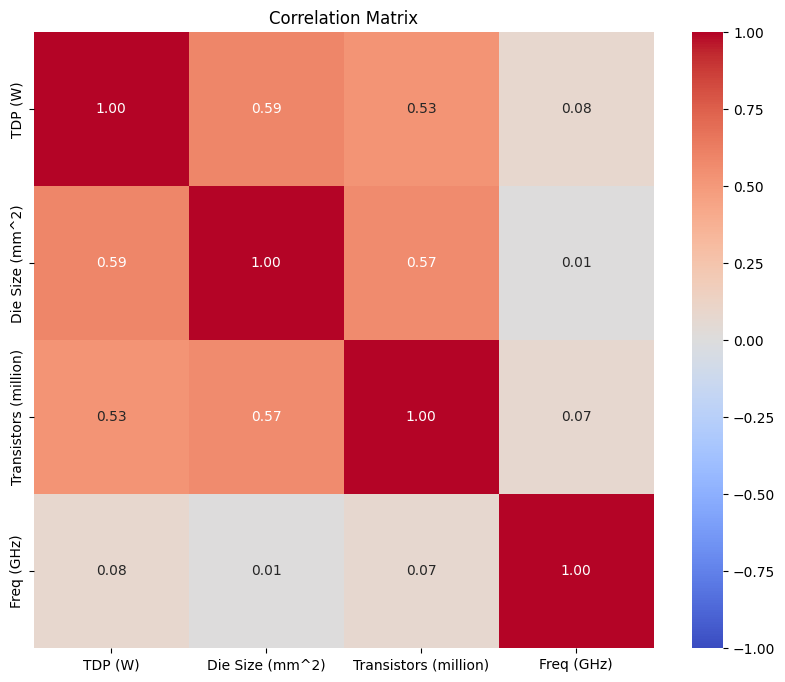

In [71]:
correlation_matrix = chips[['TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Perform the correct encoding for your data, in readiness for modelling.

In [72]:
chips

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,2000-06-05 00:00:00.000000000,180,54.0,120.0,37.0,1000.0,TSMC,AMD,19033.061063,5403.009359,1096.608263
1,AMD Athlon 1000,CPU,2000-10-31 00:00:00.000000000,180,54.0,120.0,37.0,1000.0,TSMC,AMD,19033.061063,5403.009359,1096.608263
2,AMD Athlon 1100,CPU,2000-08-14 00:00:00.000000000,180,60.0,120.0,37.0,1100.0,TSMC,AMD,19033.061063,5403.009359,1096.608263
3,AMD Athlon 1133,CPU,2000-10-31 00:00:00.000000000,180,63.0,120.0,37.0,1133.0,TSMC,AMD,19033.061063,5403.009359,1096.608263
4,AMD Athlon 1200,CPU,2000-10-31 00:00:00.000000000,180,66.0,120.0,37.0,1200.0,TSMC,AMD,19033.061063,5403.009359,1096.608263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,2012-09-04 02:02:16.536030464,8,80.0,200.0,8700.0,1042.0,Samsung,NVIDIA,6021.000000,6021.000000,94.080000
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08 00:00:00.000000000,5,220.0,294.0,35800.0,1980.0,TSMC,NVIDIA,35480.000000,35480.000000,554.400000
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08 00:00:00.000000000,5,285.0,379.0,45900.0,2340.0,TSMC,NVIDIA,44100.000000,44100.000000,689.000000
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08 00:00:00.000000000,5,320.0,379.0,45900.0,2295.0,TSMC,NVIDIA,52220.000000,52220.000000,816.000000


### Label Encoding
For Vendor

In [261]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
chips['Vendor_label'] = le.fit_transform(chips['Vendor'])
chips

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Vendor_label
2283,NVIDIA NV5,GPU,1999-03-15,250,92.539714,63.000000,15.000000,1615.43079,TSMC,NVIDIA,19033.061063,5403.009359,1096.608263,5
25,Intel Pentium III Xeon 800 2.8V,CPU,2000-01-12,180,25.000000,106.000000,28.000000,800.00000,Intel,Intel,19033.061063,5403.009359,1096.608263,3
26,Intel Pentium III Xeon 800 5V-12V,CPU,2000-01-12,180,25.000000,106.000000,28.000000,800.00000,Intel,Intel,19033.061063,5403.009359,1096.608263,3
2282,NVIDIA Vanta LT,GPU,2000-03-01,250,92.539714,63.000000,15.000000,105.00000,TSMC,NVIDIA,19033.061063,5403.009359,1096.608263,5
2285,Sony GS-250nm,GPU,2000-03-04,250,92.539714,279.000000,54.000000,1615.43079,Sony,Sony,19033.061063,5403.009359,1096.608263,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,NVIDIA Jetson Orin Nano 8 GB,GPU,2024-01-08,8,15.000000,212.972443,4836.373762,625.00000,Samsung,NVIDIA,2560.000000,1280.000000,640.000000,5
4936,NVIDIA TITAN Ada,GPU,2024-01-08,5,800.000000,609.000000,76300.000000,2235.00000,TSMC,NVIDIA,92900.000000,92900.000000,1452.000000,5
4938,Intel Data Center GPU Max NEXT,GPU,2024-01-08,7,800.000000,1280.000000,100000.000000,900.00000,Intel,Intel,65540.000000,65540.000000,65540.000000,3
4939,Intel Rialto Bridge,GPU,2024-01-08,7,92.539714,1280.000000,100000.000000,1615.43079,Intel,Intel,19033.061063,5403.009359,1096.608263,3


### ONE HOT ENCODING
For TYPE


In [267]:
### for TYPE
from sklearn.preprocessing import OneHotEncoder

def column_names(feature, category):
    return feature + '_' + category

ohe = OneHotEncoder(feature_name_combiner=column_names)

ohe_values = ohe.fit_transform(chips[['Type']]).toarray()
columns = ohe.get_feature_names_out()

ohe_enc = pd.DataFrame(ohe_values, columns=columns)
chips = pd.concat([ohe_enc, chips], axis=1).drop(columns=['Type_GPU'])


In [268]:
chips

,Type_CPU,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Vendor_label
0,0.0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1
1,1.0,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1
2,1.0,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1
3,0.0,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1
4,0.0,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.0,NVIDIA GeForce RTX 3050 6 GB,GPU,2024-01-08,8,80.0,200.0,8700.0,1042.0,Samsung,NVIDIA,6021.000000,6021.000000,94.080000,5
4941,0.0,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5,220.0,294.0,35800.0,1980.0,TSMC,NVIDIA,35480.000000,35480.000000,554.400000,5
4942,0.0,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5,285.0,379.0,45900.0,2340.0,TSMC,NVIDIA,44100.000000,44100.000000,689.000000,5
4943,0.0,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5,320.0,379.0,45900.0,2295.0,TSMC,NVIDIA,52220.000000,52220.000000,816.000000,5


### Label Encoding
For FOUNDRY

In [269]:
le = LabelEncoder()
chips['Foundry_Label'] = le.fit_transform(chips['Foundry'])


In [273]:
chips

,Type_CPU,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Vendor_label,Foundry_Label
0,0.0,AMD Athlon 1000,CPU,2000-06-05,180,54.0,120.0,37.0,1000.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1,8
1,1.0,AMD Athlon 1000,CPU,2000-10-31,180,54.0,120.0,37.0,1000.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1,8
2,1.0,AMD Athlon 1100,CPU,2000-08-14,180,60.0,120.0,37.0,1100.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1,8
3,0.0,AMD Athlon 1133,CPU,2000-10-31,180,63.0,120.0,37.0,1133.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1,8
4,0.0,AMD Athlon 1200,CPU,2000-10-31,180,66.0,120.0,37.0,1200.0,TSMC,AMD,19033.061063,5403.009359,1096.608263,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.0,NVIDIA GeForce RTX 3050 6 GB,GPU,2024-01-08,8,80.0,200.0,8700.0,1042.0,Samsung,NVIDIA,6021.000000,6021.000000,94.080000,5,6
4941,0.0,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5,220.0,294.0,35800.0,1980.0,TSMC,NVIDIA,35480.000000,35480.000000,554.400000,5,8
4942,0.0,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5,285.0,379.0,45900.0,2340.0,TSMC,NVIDIA,44100.000000,44100.000000,689.000000,5,8
4943,0.0,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5,320.0,379.0,45900.0,2295.0,TSMC,NVIDIA,52220.000000,52220.000000,816.000000,5,8
